
**Name:** Utsav Jitendrabhai Patel 

In [ ]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
import pandas as pd

In [ ]:
#Impoering google drive path
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing csv file
path = "/content/drive/MyDrive/Assign02 (1)/Assign02/Mall_Customers.csv"
df = pd.read_csv(path)

In [ ]:
#Displaying csv file
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
#Checking null values because that is easy for performing function
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
#Standardization because easy for cluster 
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [ ]:
#Fitting 2 main factor values in x
X=df[["Annual Income (k$)","Spending Score (1-100)"]]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


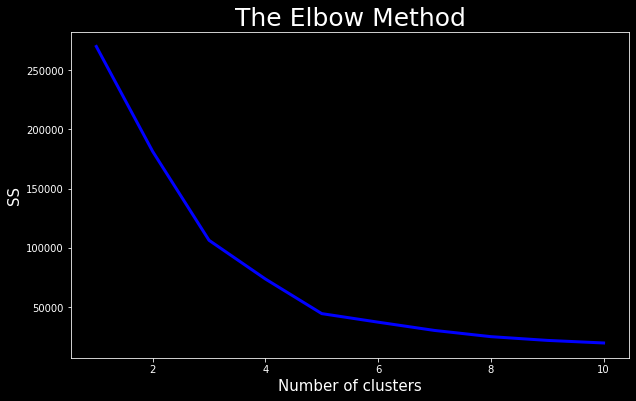

In [ ]:
#Elbow method for cluster checking
from sklearn.cluster import KMeans
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    ss.append(kmeans.inertia_) # kmeans.inertia_ will give us wcss value
plt.figure(figsize = (10,6))
plt.plot(range(1, 11), ss, lw = 3, color="blue")
plt.title('The Elbow Method', fontsize = 25)
plt.xlabel('Number of clusters', fontsize = 15)
plt.ylabel('SS', fontsize =15 )
plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
#Training model
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_pred = kmeans.fit_predict(X)
y_pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

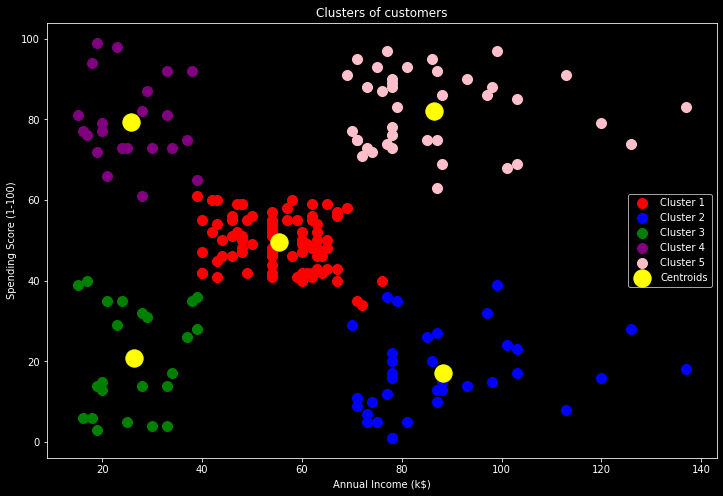

In [ ]:
#Cluster visualization(k=5)
fig = plt.figure(figsize=(12,8))
X = np.array(X)
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 100, c = 'purple', label = 'Cluster 4')
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 100, c = 'pink', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Evaluating K-means performance by Calinski-Harabasz(CH)Index

---



In [ ]:
#For 5-clusters
import sklearn
sklearn.metrics.calinski_harabasz_score(X, y_pred)

247.35899338037282

In [ ]:
#For k=2(For 2-cluster)
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_pred = kmeans.fit_predict(X)

In [ ]:
import sklearn
sklearn.metrics.calinski_harabasz_score(X, y_pred)

96.74654578369159

In [ ]:
#For k=4(For 4-cluster)
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_pred = kmeans.fit_predict(X)

In [ ]:
import sklearn
sklearn.metrics.calinski_harabasz_score(X, y_pred)

174.0644335433684

In [ ]:
#For k=5(For 5-cluster) 
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_pred = kmeans.fit_predict(X)

In [ ]:
import sklearn
sklearn.metrics.calinski_harabasz_score(X, y_pred)

247.35899338037282

In [ ]:
#For k=6(For 6-cluster) 
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_pred = kmeans.fit_predict(X)

In [ ]:
import sklearn
sklearn.metrics.calinski_harabasz_score(X, y_pred)

242.5376443336707

**Analysis of K-means algorithm:** K- mean is used for focusing on main factors. For example, We can focus on eligible customers to sell the product. It is method of partitioning into small cluster and focus on that cluster.


**Evaluate clustering performance using CH-Index:** For this cluster we have chosen k=5. Because CH-Index for this one is so high compared to others as well as the curve of elbow method has the drastic change after k=5.From CH-Index we can find the value of k.